# Data Science 2 (modeling), BFVM19DATASC2

## Multivariate Component Analysis computer-exam '20-'21 

### Tsjerk A. Wassenaar (WATS), *06-17031440*

#### Instructions

On your workstation desktop you will find all required files:

* This exam `BFVM19DATASC2_T_DataScience2_MCA_WATS.ipynb`

* Data files
  - `alpha-helix-starts-4-5.dat.gz`
  - `alpha-helix-pcoa.dat`
  - `AA.dat`

In addition, some supplementary reference materials are included:

* Jupyter notebooks `*.ipynb` and `*.html`
* Book chapters and cheat sheets `*.pdf`

Provide your answers in the code cells corresponding with each of the questions below. For those questions that require a textual answer rather than python code, you may either type your answer in the cell using a python comment or insert a text-markdown cell with your typeset answer.

All questions have the possible number of points to be scored indicated. Your grade will be calculated as follows:

$$
\text{Grade} = 1 + 9 \cdot \frac {\text{Points Scored}} {\text{Maximum Score}}
$$

Instructions on how to submit your answers are provided at the bottom. All notes, textbooks and other written reference materials are permitted.

## Assignment 1: Multidimensional Scaling

The data file `alpha-helix-starts-4-5.dat.gz` contains Cartesian X/Y/Z positions of carbon atoms that mark the beginning of alpha-helices, with five atoms before the helix and four atoms in it. The four atoms of the helix were used to align the structures, so they are all positioned in a consistent way. The structure ID from which the helix was extracted is in the first column, the second and third columns give chain ID and helix ID, respectively, and the fourth column shows a classification of the structure per amino acid.

The classification is a string of characters denoting the secondary structure (the fold of the peptide). The dissimilarity between two strings can be determined using the Hamming distance. This is given as function below. 

**Assignment:**

- Read the data in from the file `alpha-helix-starts-4-5.dat` and remove rows that contain NA values (`dropna`). 

- Use the function `hamming` to construct a distance matrix for the structure strings and perform MDS on this matrix. **NB: Make a selection of ±7500 of the strings, as it's impossible to make a distance matrix of all entries!**

- Perform MDS on the distance matrix and plot the principal coordinates.

- Interpret the plot and give an interpretation of the principal coordinates.

**Assessment:**

- Correct application of MDS

- Proper graphical representations

- Assessment and interpretation of principal coordinates

- Interpretation of and reflection on results

In [1]:
def hamming(a, b):
    '''Determine the Hamming distance for two strings.'''
    return sum(i!=j for i, j in zip(a,b))


def color(s, classification='H'):
    '''
    Return a color vector corresponding to the count of the classification per entry.
    
    Structure classes are:
        H: helix
        I: 5-helix
        G: 3-helix
        E: extended
        B: bridge
        T: turn
        S: bend
        ~: loop (unstructured)
    '''
    return np.char.count(s.astype(str), classification) - 4


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in data
data = pd.read_csv('alpha-helix-starts-4-5.dat.gz', sep='\s+', header=None).dropna()
data.head()

# Determine distance matrix
s = data[3][::50].values
n = len(s)
D = np.zeros((n, n))
T = [ [hamming(s[i], s[j]) for j in range(i+1, n)] for i in range(n-1)]

D[np.triu_indices(n, 1)] = [ j for i in T for j in i ]
D += D.T

# Perform cMDS
m = D.mean(axis=0)
A = -0.5 * ( D - m[:, None] - m[None, :] + m.mean() )

vals, vecs = np.linalg.eigh(A)
vals = vals[::-1]
vecs = vecs[:, ::-1]

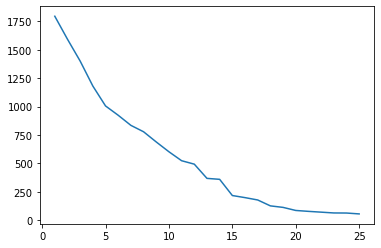

In [3]:
plt.plot(np.arange(1, 26), vals[:25])
plt.show()

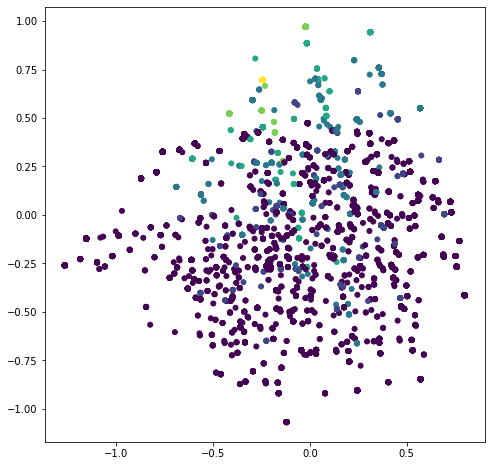

In [4]:
pcoa = vecs[:, :5] * vals[:5]**0.5
np.savetxt('alpha-helix.dat', pcoa)

fig, ax = plt.subplots(figsize=(8,8))
ax.set_aspect(1)
plt.scatter(*pcoa[:, [0, 2]].T, s=25, c=color(s, 'E'))
plt.show()


_Principal coordinates 0 and 1 show the helix-loop (H/\~), helix-extended (H/E) and extended-loop (E/\~) components_

_Principal coordinates 3 and 4 show a nice helix-turn component_

_A principal coordinate is a direction in a (here fictive) variable space such that the distance structure of the observations corresponds as closely as possible to the distance matrix of Hamming distances. The components correspond to transitions from all helix to all loop, from all helix to all turn, etc, and are governed by the structure types that occur most._


## Assignment 2: Multivariate Linear Regression.

Use the coordinate data from the same data file (`alpha-helix-starts-4-5.dat`) and the principal coordinates from Assignment 1. If doing MDS didn't work out, you can load the same data from `alpha-helix-pcoa.dat`. The principal coordinates in that file correspond to the slice \[::50\] from the original data.

Assignment:

- Perform multivariate linear regression to construct a model for predicting the principal coordinates (from sequences) from the coordinates. Note that some coordinates were set to 0 during alignment. These have 0 variance, and should be excluded.

- Plot the _estimated_ principal coordinates against the _actual_ principal coordinates. 

- Reflect on the quality of the regression model and the possibility to predict the structure classification from the coordinates using regression.

Assessment:

- Correct application of MDS
- Proper graphical representations
- Assessment and interpretation of regression
- Interpretation of and reflection on results

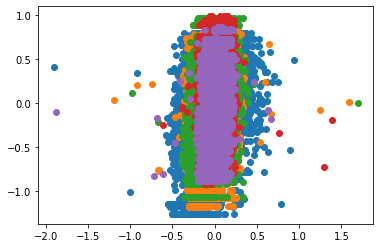

In [42]:
xyz = data.iloc[::50, 4:].values
xyz = xyz[:, xyz.var(axis=0) > 0]
X = np.concatenate((np.ones((xyz.shape[0], 1)), xyz), axis=1)

B = np.linalg.inv(X.T @ X) @ X.T @ pcoa

estimates = X @ B
errors = pcoa - estimates

for i in range(pcoa.shape[1]):
    plt.scatter(estimates[:, i], pcoa[:, i])
plt.show()

_The variation of the estimates is greater than the domain of the regressor! This is a terrible model. It's not possible to shortcut the assignments of structures from the coordinates using regression._

## Assignment 3: Factor Analysis

The file `AA.dat` contains physical and chemical parameters for a range of natural and unnatural amino acids. The properties are:

- MW: Molecular weight (size)
- TL1-7: ?
- vdW: Van-der-Waals volume
- logP: Oil-water partition coefficient (hydrophobicity)
- EHOMO: Highest occupied molecular orbital
- ELUMO: Lowest unoccupied molecular orbital
- HOF: ?
- POLAR: Polarity
- EN: ?
- HA: ?
- Stot: Total surface area
- Spol: Polar surface area
- Snp: Non-polar surface area
- HDONR: Is-a-hydrogen-donor
- HACCR: Is-a-hydrogen-acceptor
- Chpos: Positive charge
- Chneg: Negative charge

Assignment:

- Perform Factor Analysis on the data
- Plot the results as a biplot
- Interpret the results and give an interpretation of the factors/components

Assessment:

- Correct application of Factor Analysis with justification of choices made
- Proper graphical representations
- Assessment and interpretation of regression
- Interpretation of and reflection on results

In [117]:
AA = pd.read_csv('AA.dat', sep='\s+')
X = AA.values

print(AA)

         MW  TL1  TL2  TL3  TL4  TL5  TL6  TL7   vdW  logP  ...  POLAR    EN  \
Ala    89.1   60   24   29    9   52   23   37  13.7 -3.12  ...   5.34  4.47   
Arg   174.2    1    9    6    1   19    7    1  64.9 -4.79  ...  11.85  4.31   
Asn   132.1   39   14   25    5   21   12   12  32.5 -3.63  ...   7.72  4.87   
Asp   133.1   66   16    9    2   38   20   19  30.0 -2.43  ...   7.25  4.82   
Cys   121.2   35   23   27   40   46   63   81  25.0 -2.35  ...   7.07  4.62   
...     ...  ...  ...  ...  ...  ...  ...  ...   ...   ...  ...    ...   ...   
Dtca  178.2   56   23   52   25   48   44   55  51.0 -2.24  ...  10.28  5.57   
Hfnl  257.1   94   65   50   62   88   73   88  60.1 -1.26  ...  10.34  5.44   
Pfnl  221.1   97   63   49   56   89   66   89  56.6 -1.86  ...   9.77  5.14   
Pfnv  207.1   91   61   44   55   81   64   89  46.3 -1.49  ...   8.62  5.30   
Tca   160.2   67   35   51   24   54   43   74  41.5 -1.04  ...   9.65  4.17   

        HA  Stot   Spol    Snp  HDONR  

[1.99067655e+03 7.98914399e+02 3.35473923e+02 3.09537415e+02
 2.77947137e+02 5.12368906e+02 2.94950113e+02 1.02128061e+03
 4.38447653e+02 1.26652715e+00 2.37143693e-01 3.82897392e-01
 4.84586581e+03 1.27617767e+01 1.22335417e-01 1.87778912e-01
 1.78022491e+03 4.97622732e+02 1.82768321e+03 1.16142290e+00
 4.35756803e+00 1.46683673e-01 2.32426304e-02]


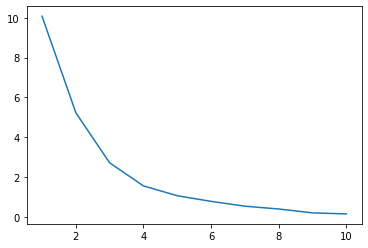

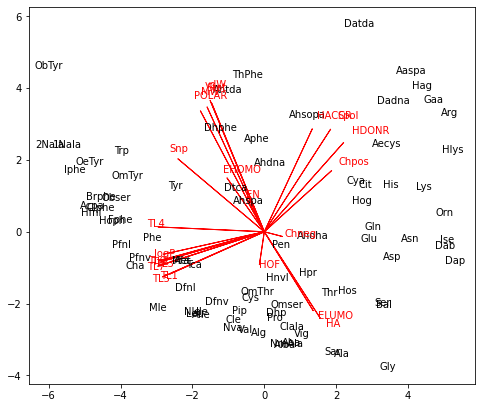

In [123]:
print(X.var(axis=0))
# Normalization is required

X = (X - X.mean(axis=0)) / X.std(axis=0)
vals, vecs = np.linalg.eigh(np.cov(X.T))
vals = vals[::-1]
vecs = vecs[:, ::-1]

plt.plot(np.arange(1, 11), vals[:10])
plt.show()

scores = X @ vecs
fig, ax = plt.subplots(figsize=(8,8))
ax.set_aspect(1)
plt.scatter(*scores[:, [0,1]].T, c='white')
for (x,y), t in zip(scores[:, [0,1]], AA.index):
    plt.text(x, y, t, horizontalalignment='center', verticalalignment='center')
for (x,y), v in zip(10*vecs[:, :2], AA.columns):
    plt.arrow(0, 0, x, y, color='red')
    plt.text(1.1 * x, 1.1 * y, v, color='red')
plt.show()


MW	[-0.02  0.37  0.09  0.12]
TL1	[-0.31 -0.01  0.14  0.05]
TL2	[-0.3   0.05  0.04  0.01]
TL3	[-0.29  0.06 -0.02 -0.06]
TL4	[-0.27  0.1   0.02  0.12]
TL5	[-0.32  0.05  0.06 -0.09]
TL6	[-0.3   0.02  0.01  0.07]
TL7	[-0.32  0.06  0.01 -0.04]
vdW	[ 0.    0.43  0.01 -0.  ]
logP	[-0.27  0.03 -0.12  0.06]
EHOMO	[ 0.03  0.14 -0.5   0.04]
ELUMO	[ 0.   -0.    0.04 -0.64]
HOF	[ 0.02 -0.14 -0.51  0.02]
POLAR	[-0.01  0.39 -0.12  0.04]
EN	[-0.02 -0.1   0.31  0.53]
HA	[-0.01 -0.08  0.31 -0.48]
Stot	[-0.    0.45  0.02 -0.07]
Spol	[0.26 0.17 0.21 0.1 ]
Snp	[-0.14  0.36 -0.09 -0.12]
HDONR	[ 0.3   0.16  0.02 -0.02]
HACCR	[0.2  0.24 0.3  0.02]
Chpos	[ 0.27  0.07 -0.22 -0.01]
Chneg	[ 0.02 -0.03  0.19  0.01]


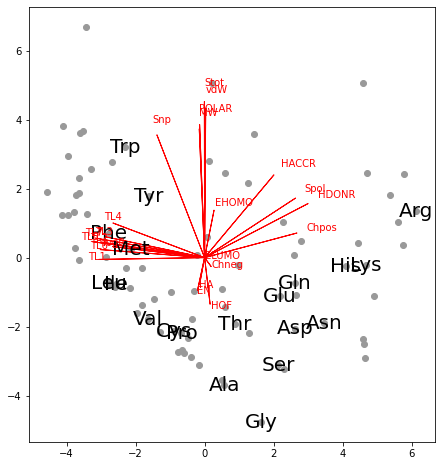

In [130]:
def varimax(components, gamma=1, maxiter=20, tol=1e-8):
    """Perform VariMax (gamma=1) or OrthoMax (gamma=0) rotation on components"""
    p,k = components.shape
    R   = np.eye(k)
    f   = float(gamma)/p
    d   = 0
    for i in range(maxiter):
        d_old = d
        L = np.dot(components, R)
        A = L**3 - f * (L*(L**2).sum(axis=0))**2
        U,s,V = np.linalg.svd(np.dot(components.T,A))
        R = np.dot(U,V)
        d = sum(s)
        if (d - d_old)**2 < tol: 
            break
    return np.dot(components, R)

V = varimax(vecs[:, :4])
F = X @ V

for i, v in zip(AA.columns, V):
    print(i, v.round(2), sep='\t')

fig, ax = plt.subplots(figsize=(8,8))
ax.set_aspect(1)
plt.scatter(*F[:, [0,1]].T, c='#999999')
for (x,y), t in zip(F[:20, [0,1]], AA.index):
    plt.text(x, y, t, horizontalalignment='center', verticalalignment='center', fontsize=20)
for (x,y), v in zip(10*V[:, :2], AA.columns):
    plt.arrow(0, 0, x, y, color='red')
    plt.text(1.1 * x, 1.1 * y, v, color='red')
plt.show()

The data need to be normalized prior to PCA, because the range of variances is humongous and the variables are completely heterogenous.

The scree plot shows that there is not a clear break point, so it's difficult to chose a number of components. Four components capture 21/23 * 100% = 91.3% of the correlation, so that seems a proper number.

The varimax rotation results in the first component to be associated with the TL parameters (forgot what those are), the hydrophobicity and the polarity. The second component seems to reflect the size (MW, vdW, Stot).



***

<div class="alert alert-warning">
<b>After finishing:</b>
<ol><li>
Rename your notebook with your name and student number, like `JohnDoe_123456`, using the menu option `File` > `Rename`.
</li><li>
Evaluate the notebook by means of the menu option `Kernel` > `Restart & Run All` and check that your notebook runs without errors.
</li><li>
Save the evaluated notebook using the menu option `File` > `Save and Checkpoint`.
</li><li>
Open a terminal, change to the desktop folder using `cd ~/Desktop`, and submit your work using a command like `submit_your_work 123456 JohnDoe_123456.ipynb` (enter `submit_your_work --help` to get help on submit script usage).
</li><li>
After getting clearance from the person monitoring the exam, you are free to leave.
</li></ol>
</div>

#### Success!